<a href="https://colab.research.google.com/github/weensirin/deepLearningHomework/blob/main/Banking_Dataset_Marketing_Targets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Banking Dataset - Marketing Targets**



About Dataset
Context: Term deposits are a major source of income for bank. The bank has various plans to sell term deposits to their customers, including of telephonic campagins. However, they require high investment. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically ratgeted via call.

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# 1) Importing Packages & Import Data

In [1]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df_alldata = pd.read_csv('https://raw.githubusercontent.com/pakkardkaw/deepLearningHomework/main/train.csv',delimiter=';')

In [3]:
df_alldata.shape

(45211, 17)

In [4]:
df_alldata=df_alldata.dropna(axis=0)

In [5]:
df_alldata.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# 2) Exploration Data Analysis (EDA)


In [6]:
df_alldata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
for x_col in df_alldata.columns:
  fig = px.histogram(df_alldata, x=x_col, color="y",title="x_col")
  fig.show()




# 3) Preprocessing
# 3.1) Encoding data

In [8]:
#encoding
print('job : ', df_alldata.job.unique())
print('marital :', df_alldata.marital.unique())
print('education : ',df_alldata.education.unique())
print('default :', df_alldata.default.unique())
print('housing : ', df_alldata.housing.unique())
print('loan :', df_alldata.loan.unique())
print('contact :', df_alldata.contact.unique())
print('month :', df_alldata.month.unique())
print('poutcome :', df_alldata.poutcome.unique())
#print('y :', df_alldata.y.unique())

job :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education :  ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
housing :  ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'failure' 'other' 'success']


In [9]:
cath_feature = pd.DataFrame(df_alldata,columns = ['job','marital','education','default','housing','loan','contact','month','poutcome'])
one_hot_data = pd.get_dummies(cath_feature)

drop_list = ['job','marital','education','default','housing','loan','contact','month','poutcome']
df_alldata.drop(drop_list,axis=1,inplace=True)

df_new = pd.concat([df_alldata,one_hot_data],axis=1)
df_new.dtypes

age                     int64
balance                 int64
day                     int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
y                      object
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
job_unknown             uint8
marital_divorced        uint8
marital_married         uint8
marital_single          uint8
education_primary       uint8
education_secondary     uint8
education_tertiary      uint8
education_unknown       uint8
default_no              uint8
default_yes             uint8
housing_no              uint8
housing_yes             uint8
loan_no                 uint8
loan_yes                uint8
contact_ce

In [10]:
#Encode Catagorical data
df_new['y']=df_new['y'].map({'no':0, 'yes':1 })
df_new.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_teleph

In [11]:
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(60,30)
plt.show()

"sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix\nfig=plt.gcf()\nfig.set_size_inches(60,30)\nplt.show()"

# 3.2) Handling Imbalance data
Over- sampling
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [12]:
pos = df_new[df_new['y']==1]
neg = df_new[df_new['y']==0]
print(pos.shape)
print(neg.shape)

(5289, 52)
(39922, 52)


In [13]:
# Over-sampling
pos_rand = pos.sample(neg.shape[0],replace = True)  # duplicates randomly *exit.shape[0] - stay.shape[0]* samples
pos_rand.shape

(39922, 52)

In [14]:
# New dataset 
# df_new = pd.concat([neg_rand,pos],axis =0)
df_over = pd.concat([pos_rand,neg],axis =0)
df_over['y'].value_counts()

1    39922
0    39922
Name: y, dtype: int64

# 3.3) Spliting data

Splitting of the Data into separate training 70%, test 20% and validate set 10%

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#Split Train Test Data  train test valiation 70% 20% 10%
from sklearn.model_selection import train_test_split
x_all=df_over
y_all=df_over[['y']]


x_train, x_test, y_train, y_test = train_test_split(df_over, df_over[['y']],train_size=0.8,stratify=df_over[['y']],random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train[['y']],train_size=0.875,stratify=y_train[['y']],random_state=1)


#Explore Train & Test

for x_col in x_train.columns:
    fig = px.histogram(x_train, x=x_col, color="y",title="Train")
    fig.show()
    fig = px.histogram(x_test, x=x_col, color="y",title="Test")
    fig.show()
    fig = px.histogram(x_valid, x=x_col, color="y",title="Validate")
    fig.show()


x_train=x_train.drop('y',axis=1)
x_test=x_test.drop('y',axis=1)
x_valid=x_valid.drop('y',axis=1)

# 3.4) Normalize data

In [19]:
#Normalize data
scaler = StandardScaler()  
scaler.fit(x_train) 
x_train = scaler.transform(x_train) 

In [20]:
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

# 4) Machine learning
Model selection on scikit-learn

In [21]:
#set Seed for each repetitive
seednumber=[911,444,888]

In [22]:
import time

In [23]:
#ML Model


from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline


best_model = None
best_model_name = ""
best_valid = 0
resultlist= pd.DataFrame([], columns=['model', 'runtime','Acc','repetition','type'])
for i in range(3):
  print("******************************************************************")
  print("********   Repetitive" +str(i) + "  Set Seed = " + str(seednumber[i]))
  models = []
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('QDA', QuadraticDiscriminantAnalysis()))
  models.append(('AdaBoost', AdaBoostClassifier(random_state=seednumber[i])))
  models.append(('Bagging', BaggingClassifier(random_state=seednumber[i])))
  models.append(('Extra Trees Ensemble', ExtraTreesClassifier(random_state=seednumber[i])))
  models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=seednumber[i])))
  models.append(('Random Forest', RandomForestClassifier(random_state=seednumber[i])))
  models.append(('Ridge', RidgeClassifier(random_state=seednumber[i])))
  models.append(('SGD', SGDClassifier(random_state=seednumber[i])))
  models.append(('BNB', BernoulliNB()))
  models.append(('GNB', GaussianNB()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('MLP', MLPClassifier(random_state=seednumber[i])))
  models.append(('LSVC', LinearSVC(random_state=seednumber[i])))
  models.append(('DTC', DecisionTreeClassifier(random_state=seednumber[i])))
  models.append(('ETC', ExtraTreeClassifier(random_state=seednumber[i])))
  models.append(('XGB', XGBClassifier(objective='binary:logistic',eval_metric=['logloss'],random_state=seednumber[i])))
  models.append(('XGBRF', XGBRFClassifier(objective='binary:logistic',eval_metric=['logloss'],random_state=seednumber[i])))
  DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "SVC"}

  for name, model in models:
      start_time = time.time()
      model.fit(x_train, y_train)
      end_time = time.time()
      
      if name in DECISION_FUNCTIONS:
          proba = model.decision_function(x_test)
      else:
          proba = model.predict_proba(x_test)[:, 1]
      y_pred=model.predict(x_test)
      s=accuracy_score(y_test,y_pred) #f1_score(y_test, model.predict(x_test), average='weighted') 

      trainscore=accuracy_score(y_train,model.predict(x_train))
      
      #score =  roc_auc_score(y_train, proba)

      
      result = {'model': name, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i,'type' :'ML'}
      resultlist=resultlist.append(result, ignore_index = True)
      """
      fpr, tpr, _  = roc_curve(y_test, proba)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
      plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
      plt.title(f"{name} Results")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.legend(loc="lower right")
      plt.show()
      """
      print(  name+ " Accuracy =" + str(s))
      print(  name+ "--- %s seconds ---" % (end_time - start_time))
      
      if trainscore > best_valid:
          best_valid = trainscore
          best_model = model
          best_model_name = name

  print(f"Best model is {best_model_name}")

******************************************************************
********   Repetitive0  Set Seed = 911
LDA Accuracy =0.8274156177594089
LDA--- 0.4807703495025635 seconds ---
QDA Accuracy =0.5718579748262258
QDA--- 0.22169184684753418 seconds ---
AdaBoost Accuracy =0.8414427954161188
AdaBoost--- 2.7018871307373047 seconds ---
Bagging Accuracy =0.9604233201828543
Bagging--- 4.06101131439209 seconds ---
Extra Trees Ensemble Accuracy =0.9786461268708122
Extra Trees Ensemble--- 13.515962362289429 seconds ---
Gradient Boosting Accuracy =0.8639238524641493
Gradient Boosting--- 12.444481611251831 seconds ---
Random Forest Accuracy =0.9653704051599975
Random Forest--- 5.732707500457764 seconds ---
Ridge Accuracy =0.8274156177594089
Ridge--- 0.0702064037322998 seconds ---
SGD Accuracy =0.8325505667230259
SGD--- 0.538841962814331 seconds ---
BNB Accuracy =0.7229632412799799
BNB--- 0.06580400466918945 seconds ---
GNB Accuracy =0.7195190681946271
GNB--- 0.04954051971435547 seconds ---
KNN Accura

# 4.1) Compare Model - Before tuning

In [24]:
# Compare Machine Learning

accResult=resultlist[["model","Acc"]].groupby("model").mean().reset_index()
print(resultlist[["model","Acc"]].groupby("model").agg(['mean','std','count']))
print("********************")
print("The best model is " + accResult[accResult['Acc']==max(accResult['Acc'])]['model'])
#fig = px.scatter(resultlist, x="runtime", y="Acc", color="model",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models')
#fig.show()


#fig = px.box(resultlist, x="model", y="Acc", points="all",title="Accuracy score for ML model")
#fig.show()

#fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
#fig.show()

#print(np.argmax(y_pred))




                           Acc                
                          mean       std count
model                                         
AdaBoost              0.841443  0.000000     3
BNB                   0.722963  0.000000     3
Bagging               0.960903  0.000886     3
DTC                   0.957334  0.000191     3
ETC                   0.952888  0.001913     3
Extra Trees Ensemble  0.978500  0.000253     3
GNB                   0.719519  0.000000     3
Gradient Boosting     0.863924  0.000000     3
KNN                   0.901685  0.000000     3
LDA                   0.827416  0.000000     3
LSVC                  0.831465  0.000345     3
MLP                   0.920241  0.001860     3
QDA                   0.571858  0.000000     3
Random Forest         0.964849  0.000502     3
Ridge                 0.827416  0.000000     3
SGD                   0.829586  0.002884     3
XGB                   0.861294  0.000000     3
XGBRF                 0.788006  0.000130     3
*************

# 4.2) Tuning model
Tune ExtraTreesClassifier (Adjust n_estimators)

In [25]:
h_n_estimator=range(50,300,50)

best_score=0
best_n_estimator=0

MLTuneResultlist= pd.DataFrame([], columns=['parameter','parameter_value', 'runtime','Acc','repetition'])
for i in range(3):
  print("**************** Repetitive "+str(i)+" **")
  for n_e in h_n_estimator:
    start_time = time.time()
    clf = ExtraTreesClassifier(n_estimators=n_e,random_state=seednumber[i]).fit(x_train, y_train)
    end_time = time.time()
    s=accuracy_score(y_valid,clf.predict(x_valid)) #clf.score(x_test, y_test)
    MLTuneResult = {'parameter': 'n_estimators','parameter_value': n_e, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    MLTuneResultlist=MLTuneResultlist.append(MLTuneResult, ignore_index = True)
    
    print('n_estimator = '+str(n_e)+ "   Acc="+str(s))
    if s>best_score:
      best_score=s
      best_n_estimator=n_e


**************** Repetitive 0 **
n_estimator = 50   Acc=0.9747025673137132
n_estimator = 100   Acc=0.9747025673137132
n_estimator = 150   Acc=0.9742016280525986
n_estimator = 200   Acc=0.9744520976831559
n_estimator = 250   Acc=0.9745773324984346
**************** Repetitive 1 **
n_estimator = 50   Acc=0.9737006887914841
n_estimator = 100   Acc=0.9733249843456481
n_estimator = 150   Acc=0.9730745147150908
n_estimator = 200   Acc=0.9733249843456481
n_estimator = 250   Acc=0.9743268628678773
**************** Repetitive 2 **
n_estimator = 50   Acc=0.9747025673137132
n_estimator = 100   Acc=0.9744520976831559
n_estimator = 150   Acc=0.9749530369442705
n_estimator = 200   Acc=0.9743268628678773
n_estimator = 250   Acc=0.9749530369442705


In [26]:
print(MLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std']).reset_index())

      parameter parameter_value       Acc              runtime          
                                     mean       std       mean       std
0  n_estimators              50  0.974369  0.000578   3.098665  0.173256
1  n_estimators             100  0.974160  0.000734   6.508637  0.763631
2  n_estimators             150  0.974076  0.000946   9.417723  0.191054
3  n_estimators             200  0.974035  0.000618  12.555369  0.253927
4  n_estimators             250  0.974619  0.000315  15.657205  0.329561


4.3 Compare ML Model after tune

In [27]:
FinalResultList= pd.DataFrame([], columns=['model', 'train time', 'inference time','Acc','repetition','type'])
MLCompareDataSetResultlist= pd.DataFrame([], columns=['data set','train time', 'inference time','Acc','records','repetition'])

for i in range(3):
  train_start_time = time.time()
  clf = ExtraTreesClassifier(n_estimators=best_n_estimator,random_state=seednumber[i]).fit(x_train, y_train)
  train_end_time = time.time()
  inference_start_time = time.time()
  s=clf.score(x_train, y_train)
  inference_end_time = time.time()
  result = {'data set': 'train', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_train.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)
  inference_start_time = time.time()
  s=clf.score(x_valid, y_valid)
  inference_end_time = time.time()
  result = {'data set': 'validate', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_valid.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)
  inference_start_time = time.time()
  s=clf.score(x_test, y_test)
  inference_end_time = time.time()
  result = {'data set': 'test', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_test.shape[0],'repetition' : i }
  MLCompareDataSetResultlist=MLCompareDataSetResultlist.append(result, ignore_index = True)

  
  result = {'model': 'ExtraTreesClassifier', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'repetition' : i,'type' :'ML'}
  FinalResultList=FinalResultList.append(result, ignore_index = True)

  print(confusion_matrix(y_test,clf.predict(x_test)))

[[7656  328]
 [  14 7971]]
[[7648  336]
 [  15 7970]]
[[7657  327]
 [  15 7970]]


In [28]:
######################################################
## To fill result in Train vs Validation vs Test table
########################################################
print(MLCompareDataSetResultlist[['data set','train time', 'inference time','Acc','records']].groupby('data set').agg(['mean','std']).reset_index())

   data set train time          inference time                 Acc            \
                  mean      std           mean       std      mean       std   
0      test   9.082375  0.07783       0.677080  0.006826  0.978396  0.000325   
1     train   9.082375  0.07783       2.377887  0.028939  1.000000  0.000000   
2  validate   9.082375  0.07783       0.381247  0.006382  0.974076  0.000946   

   records       
      mean  std  
0  15969.0  0.0  
1  55890.0  0.0  
2   7985.0  0.0  


# 5) Deep learning

In [29]:
!nvidia-smi -L
import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

GPU 0: Tesla T4 (UUID: GPU-a047454b-1949-fc6b-b161-3f3a1773e662)
TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


#5.1) Change data Type

In [30]:
x_traindp = x_train.astype(np.float32)
x_testdp = x_test.astype(np.float32)
x_validdp = x_valid.astype(np.float32)

y_traindp = y_train.to_numpy()
y_testdp = y_test.to_numpy()
y_validdp = y_valid.to_numpy()

# 5.2) Create the network architecture

In [31]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1664      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 6

# 5.3) Compile the model

In [32]:
#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )

# 5.4) Tune batch size (32, 64, 128)

In [33]:
import time
h_batch_size=[32,64,128]

DLTuneResultlist= pd.DataFrame([], columns=['parameter','parameter_value', 'runtime','Acc','repetition'])
best_batch_number=h_batch_size[0]
best_s=0
for i in range(1): #round
  
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])

  for h_n in h_batch_size:
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                    save_weights_only=True,
                                                                    monitor='val_acc',
                                                                    mode='max',
                                                                    save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=h_n, epochs=100, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)

    if s>best_s:
      best_s=s
      best_batch_number=h_n

    DLTuneResult = {'parameter': 'h_batch_size','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())
print('Best batch size = ' + str(best_batch_number))

Epoch 1/100
1223/1223 [==============================] - 10s 5ms/step - loss: 0.4509 - acc: 0.7970 - val_loss: 0.3429 - val_acc: 0.8541
Epoch 2/100
1223/1223 [==============================] - 6s 5ms/step - loss: 0.3634 - acc: 0.8476 - val_loss: 0.3208 - val_acc: 0.8653
Epoch 3/100
1223/1223 [==============================] - 5s 4ms/step - loss: 0.3413 - acc: 0.8582 - val_loss: 0.3146 - val_acc: 0.8701
Epoch 4/100
1223/1223 [==============================] - 6s 5ms/step - loss: 0.3309 - acc: 0.8647 - val_loss: 0.3041 - val_acc: 0.8756
Epoch 5/100
1223/1223 [==============================] - 6s 5ms/step - loss: 0.3222 - acc: 0.8687 - val_loss: 0.2975 - val_acc: 0.8779
Epoch 6/100
1223/1223 [==============================] - 6s 4ms/step - loss: 0.3151 - acc: 0.8710 - val_loss: 0.2953 - val_acc: 0.8809
Epoch 7/100
1223/1223 [==============================] - 5s 4ms/step - loss: 0.3125 - acc: 0.8729 - val_loss: 0.2900 - val_acc: 0.8809
Epoch 8/100
1223/1223 [==============================]

# 5.5) Tune Epoch (50,100,300)

In [ ]:
h_Epoch=[50,100,300]
best_Epoch=h_Epoch[0]
best_s=0


for i in range(1):
  
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])

  for h_n in h_Epoch:
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                  save_weights_only=True,
                                                                                                  monitor='val_acc',
                                                                                                  mode='max',
                                                                                                  save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=h_n, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)
    if s>best_s:
      best_s=s
      best_Epoch=h_n


    DLTuneResult = {'parameter': 'h_epoch','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())

print('Best Epoch = ' + str(best_Epoch))

Epoch 1/50
306/306 [==============================] - 2s 5ms/step - loss: 0.1441 - acc: 0.9419 - val_loss: 0.2498 - val_acc: 0.9288
Epoch 2/50
306/306 [==============================] - 1s 4ms/step - loss: 0.1411 - acc: 0.9428 - val_loss: 0.2752 - val_acc: 0.9243
Epoch 3/50
306/306 [==============================] - 1s 5ms/step - loss: 0.1423 - acc: 0.9427 - val_loss: 0.2602 - val_acc: 0.9269
Epoch 4/50
306/306 [==============================] - 1s 5ms/step - loss: 0.1451 - acc: 0.9419 - val_loss: 0.2556 - val_acc: 0.9291
Epoch 5/50
306/306 [==============================] - 1s 5ms/step - loss: 0.1438 - acc: 0.9406 - val_loss: 0.2521 - val_acc: 0.9291
Epoch 6/50
306/306 [==============================] - 1s 5ms/step - loss: 0.1454 - acc: 0.9410 - val_loss: 0.2485 - val_acc: 0.9294
Epoch 7/50
306/306 [==============================] - 1s 5ms/step - loss: 0.1438 - acc: 0.9421 - val_loss: 0.2517 - val_acc: 0.9292
Epoch 8/50
306/306 [==============================] - 1s 5ms/step - loss: 0.

In [ ]:
import time

# 5.6) Tune optimizer Adam,Adamax,Nadam

In [36]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K
h_optimizer=['Adam','Adamax','Nadam']
best_s=0
best_optimizer=h_optimizer[0]
for h_n in h_optimizer:
  # Compile with default values for both optimizer and loss
  model.compile( optimizer=h_n, loss='sparse_categorical_crossentropy', metrics=['acc'] )
  # Compile + hyperparameter tuning
  model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                        metrics=['acc'] 
                      )


  for i in range(1):
    checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                  save_weights_only=True,
                                                                                                  monitor='val_acc',
                                                                                                  mode='max',
                                                                                                  save_best_only=True)

    start_time = time.time()
    history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=best_Epoch, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
    end_time = time.time()

    y_pred = model.predict( x_validdp)
    s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
    print(s)

    if s>best_s:
      best_s=s
      best_optimizer=h_n


    DLTuneResult = {'parameter': 'optimizer','parameter_value': h_n, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
    DLTuneResultlist=DLTuneResultlist.append(DLTuneResult, ignore_index = True)

print(DLTuneResultlist[['parameter','parameter_value','Acc','runtime']].groupby(['parameter','parameter_value']).agg(['mean','std','count']).reset_index())

print('Best Optimizer = ' + str(best_optimizer))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1664      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

# 5.6) Inference on train, validate and test dataset

In [41]:
DLCompareDataSetResultlist= pd.DataFrame([], columns=['data set','train time', 'inference time','Acc','records','repetition'])

model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

#create function to calculate f1
from keras import backend as K

# Compile with default values for both optimizer and loss
model.compile( optimizer=best_optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )


for i in range(3):
  np.random.seed(seednumber[i])
  tf.random.set_seed(seednumber[i])
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                save_weights_only=True,
                                                                                                monitor='val_acc',
                                                                                                mode='max',
                                                                                                save_best_only=True)

  train_start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=best_batch_number, epochs=best_Epoch, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  train_end_time = time.time()

  inference_start_time = time.time()
  y_pred = model.predict( x_traindp)
  inference_end_time = time.time()
  s=accuracy_score(y_traindp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'train', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_traindp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)

  inference_start_time = time.time()
  y_pred = model.predict( x_validdp)
  inference_end_time = time.time()
  s=accuracy_score(y_validdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'validation', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_validdp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)

  inference_start_time = time.time()
  y_pred = model.predict( x_testdp)
  inference_end_time = time.time()
  s=accuracy_score(y_testdp,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'data set': 'test', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'records' : x_testdp.shape[0],'repetition' : i }
  DLCompareDataSetResultlist=DLCompareDataSetResultlist.append(result, ignore_index = True)



  
  result = {'model': 'Deeplearning', 'train time': train_end_time - train_start_time,'inference time': inference_end_time-inference_start_time, 'Acc': s,'repetition' : i,'type' :'DL'}
  FinalResultList=FinalResultList.append(result, ignore_index = True)

  print(confusion_matrix(y_test,clf.predict(x_test)))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                1664      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                

In [42]:
#################
## To fill in  Train vs Validation vs Test
#######################

print(DLCompareDataSetResultlist[['data set','train time', 'inference time','Acc','records']].groupby('data set').agg(['mean','std']).reset_index())

     data set  train time            inference time                 Acc  \
                     mean        std           mean       std      mean   
0        test  463.033707  18.070129       0.672417  0.007325  0.926483   
1       train  463.033707  18.070129       2.367376  0.249325  0.951572   
2  validation  463.033707  18.070129       0.457868  0.174825  0.923148   

             records       
        std     mean  std  
0  0.001042  15969.0  0.0  
1  0.002759  55890.0  0.0  
2  0.000289   7985.0  0.0  


total 9520
-rw-r--r-- 1 root root 52256 Sep  8 08:17 bestmodel_epoch251_valloss0.25.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:16 bestmodel_epoch219_valloss0.24.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:15 bestmodel_epoch147_valloss0.24.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:12 bestmodel_epoch56_valloss0.25.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:11 bestmodel_epoch12_valloss0.24.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:11 bestmodel_epoch04_valloss0.24.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:11 bestmodel_epoch03_valloss0.25.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:11 bestmodel_epoch02_valloss0.24.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:11 bestmodel_epoch01_valloss0.25.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:10 bestmodel_epoch296_valloss0.24.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:08 bestmodel_epoch182_valloss0.24.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:07 bestmodel_epoch167_valloss0.24.hdf5
-rw-r--r-- 1 root root 52256 Sep  8 08:04 bestmodel_epoch37

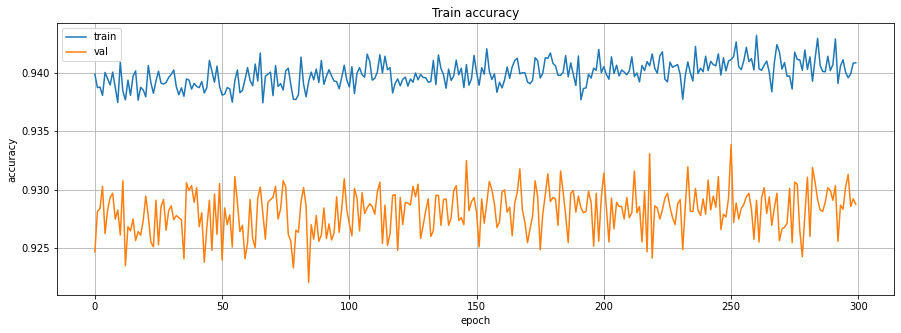

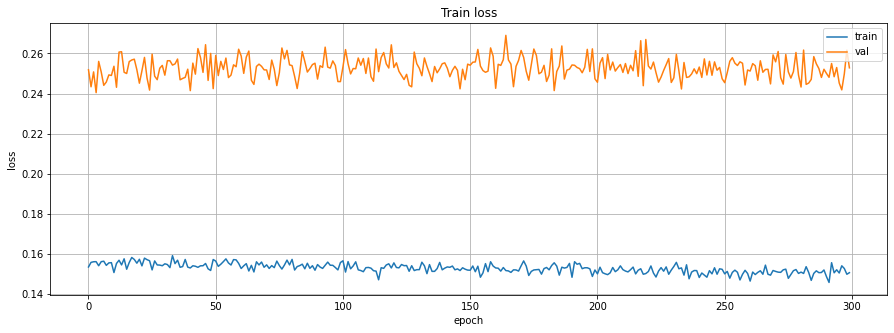

In [43]:
#######################################################################
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

history.history.keys()
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

#Compare all ML and DL Models

In [44]:
#Compare ML result after tune


print(FinalResultList[['model','Acc','train time', 'inference time']].groupby('model').agg(['mean','std']))

fig = px.scatter(FinalResultList, x="train time", y="Acc", color="type",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models',symbol = 'model')
fig.show()


fig = px.box(FinalResultList, x="model", y="Acc", points="all",title="Acc score for ML model",color="type")
fig.show()

fig = px.box(FinalResultList, x="model", y="train time", points="all",title="Train time for ML model",color="type")
fig.show()

fig = px.box(FinalResultList, x="model", y="inference time", points="all",title="Inference time for ML model",color="type")
fig.show()



                           Acc            train time             \
                          mean       std        mean        std   
model                                                             
Deeplearning          0.925940  0.002368  466.442148  22.469914   
ExtraTreesClassifier  0.978396  0.000325    9.082375   0.077830   

                     inference time            
                               mean       std  
model                                          
Deeplearning               0.686004  0.041266  
ExtraTreesClassifier       0.677080  0.006826  
